<a href="https://colab.research.google.com/github/TamaradosAnjos/Campeonato_Brasileiro/blob/main/Carteira_de_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBR3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


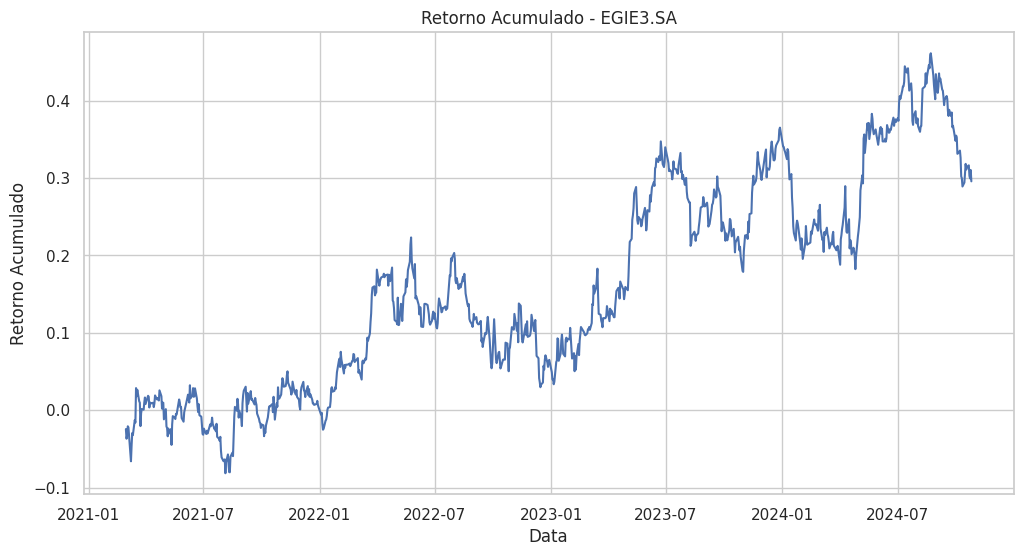

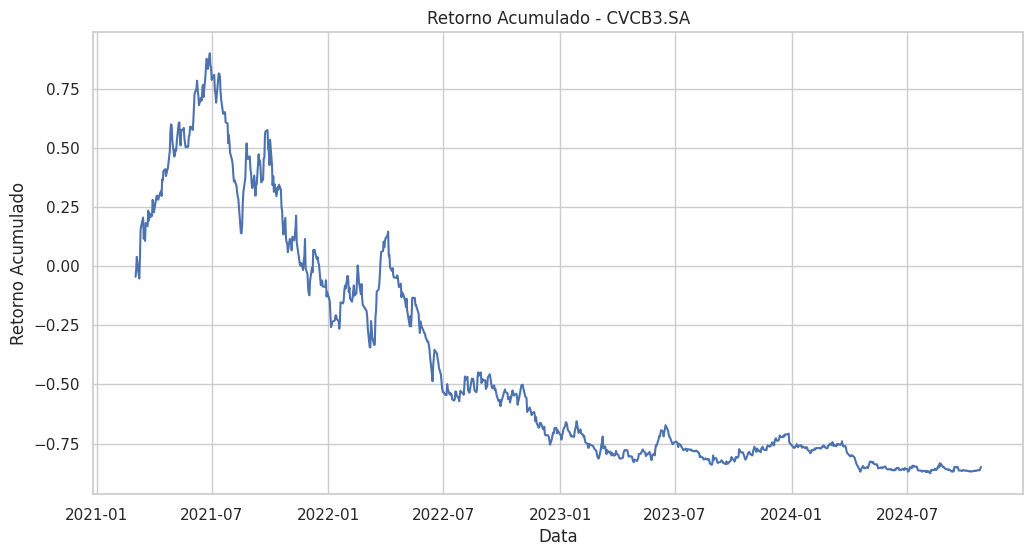

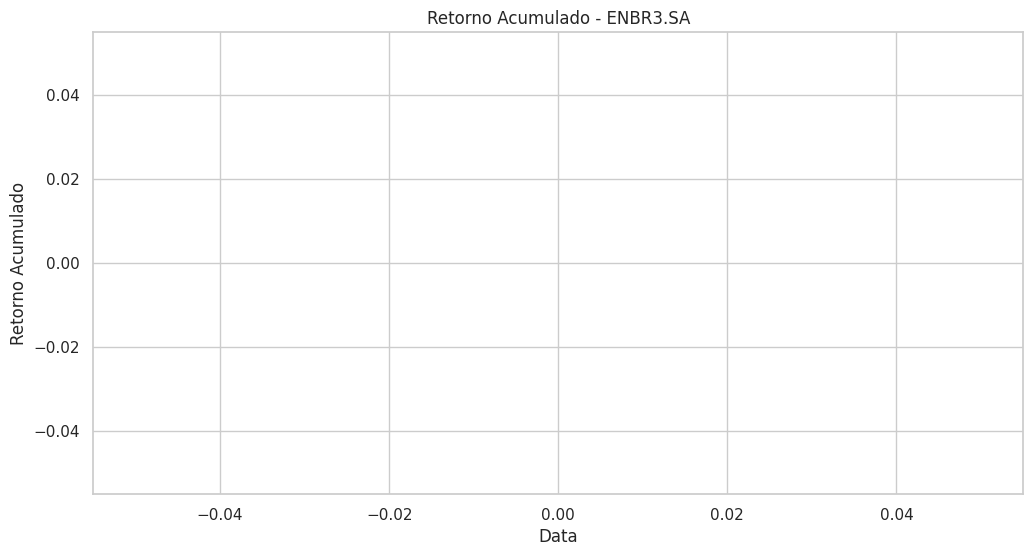

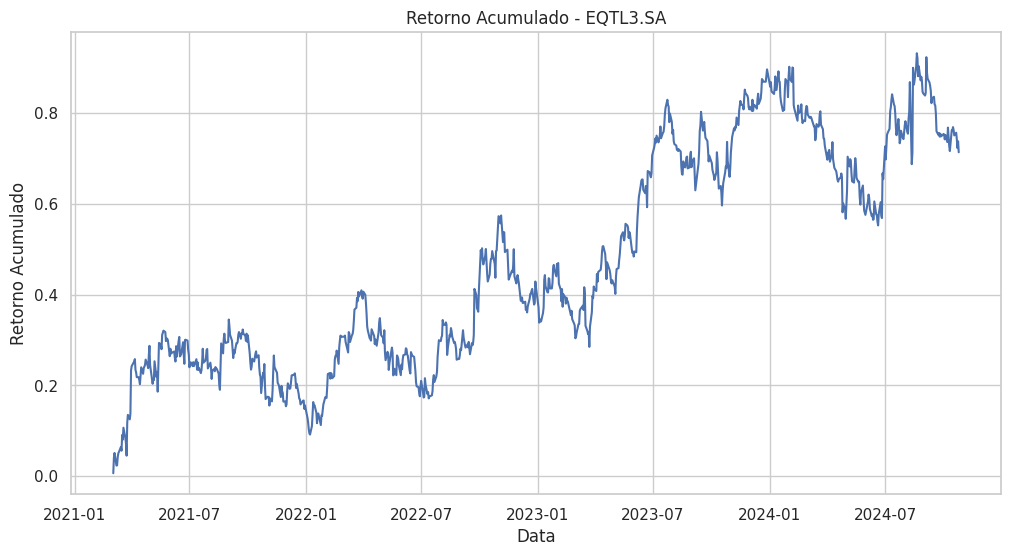

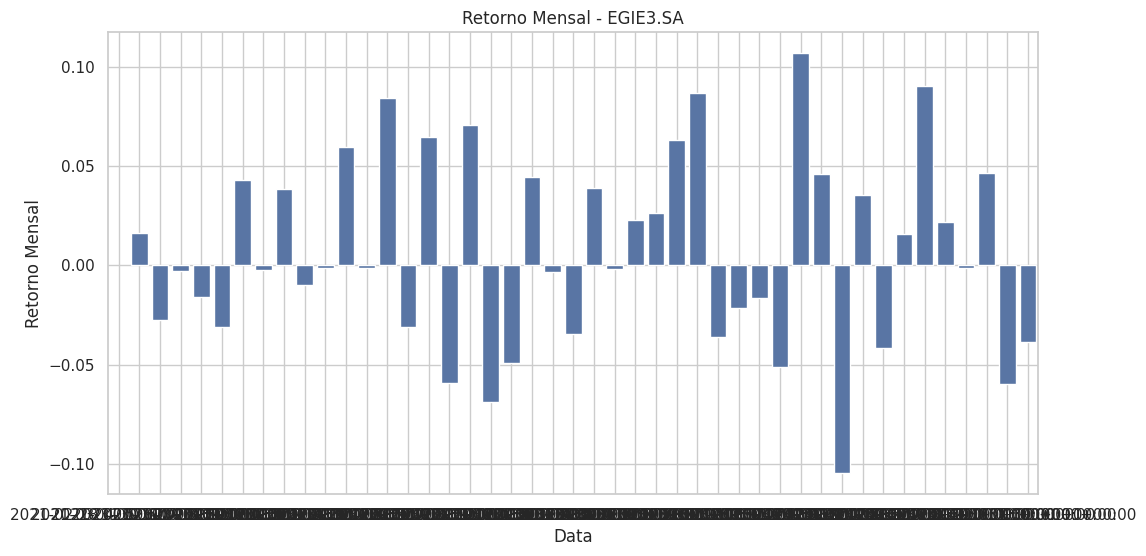

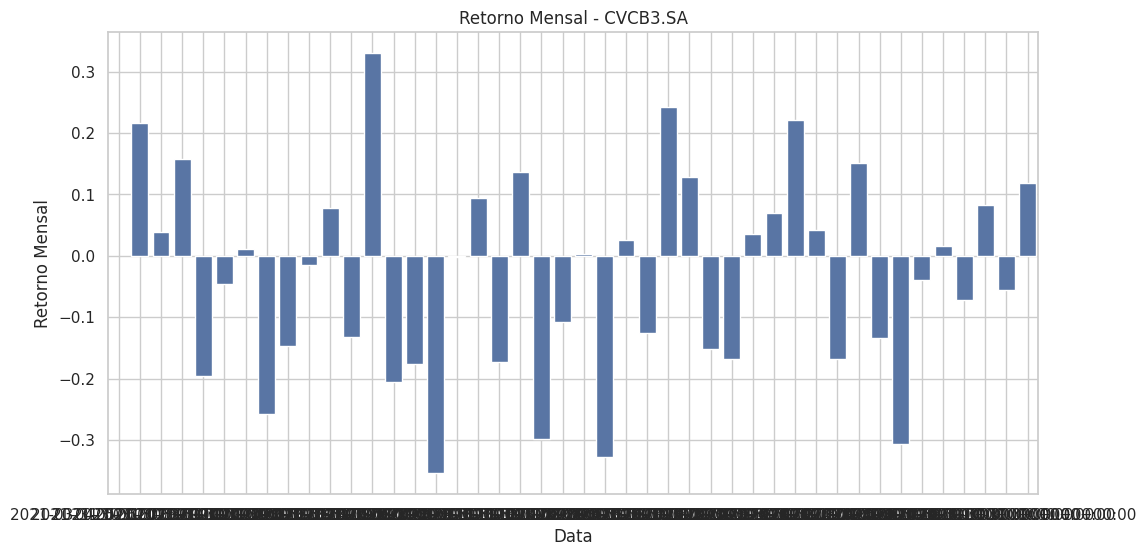

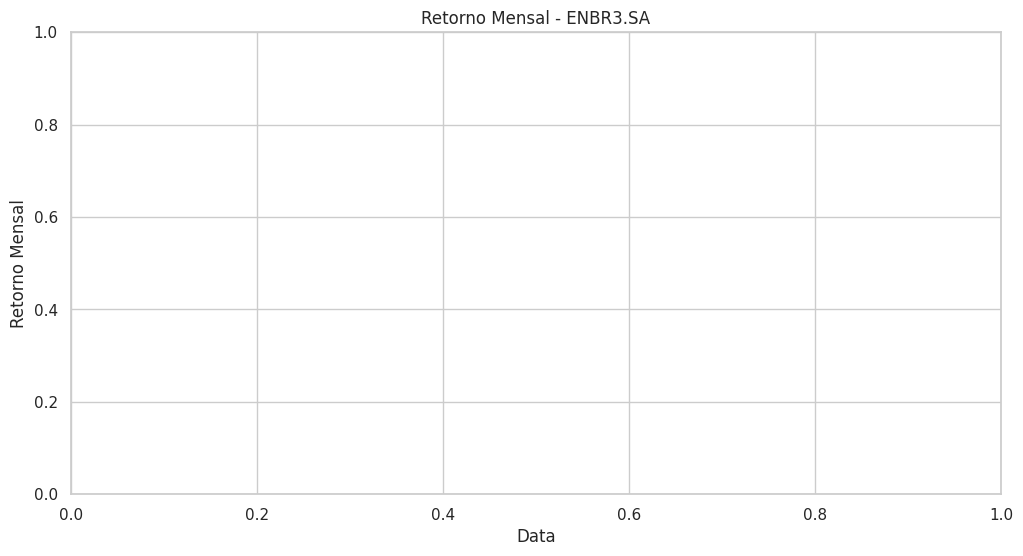

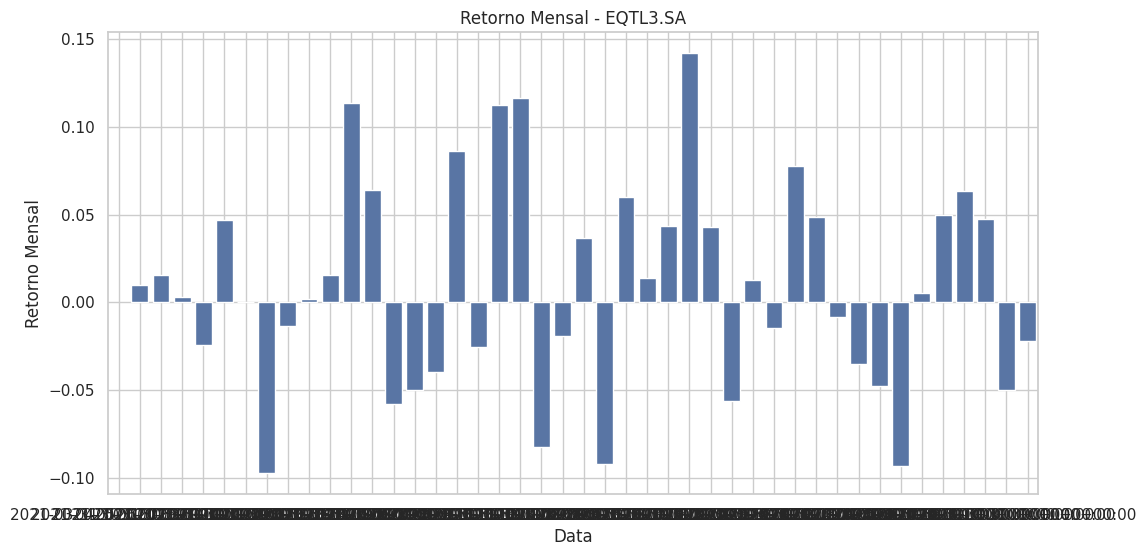

Retorno Médio Anual: 18.25%
Volatilidade Anual: 26.19%


In [130]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Lista de ações
acoes = [
    {'ticker': 'EGIE3.SA', 'quantidade': 18, 'data_compra': '2021-02-26'},
    {'ticker': 'CVCB3.SA', 'quantidade': 40, 'data_compra': '2021-03-02'},
    {'ticker': 'ENBR3.SA', 'quantidade': 59, 'data_compra': '2021-03-02'},
    {'ticker': 'EQTL3.SA', 'quantidade': 38, 'data_compra': '2021-03-02'}
]

# Função para obter os dados históricos das ações
def get_historical_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)

# Função para calcular o retorno acumulado
def calculate_cumulative_return(df):
    df['Retorno_Diario'] = df['Adj Close'].pct_change()
    df['Retorno_Acumulado'] = (1 + df['Retorno_Diario']).cumprod() - 1
    return df

# Função para calcular o retorno mensal
def calculate_monthly_return(df):
    df_monthly = df.resample('M').last()
    df_monthly['Retorno_Mensal'] = df_monthly['Adj Close'].pct_change()
    return df_monthly

# Data atual
data_atual = datetime.now().strftime('%Y-%m-%d')

# Dicionário para armazenar os dataframes
dataframes = {}

for acao in acoes:
    ticker = acao['ticker']
    start_date = acao['data_compra']

    # Obtendo os dados históricos
    df = get_historical_data(ticker, start_date, data_atual)

    # Calculando os retornos
    df = calculate_cumulative_return(df)
    df_monthly = calculate_monthly_return(df)

    # Armazenando os dataframes
    dataframes[ticker] = {'diario': df, 'mensal': df_monthly}

# Plotando os gráficos de retorno acumulado
for ticker, df_dict in dataframes.items():
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_dict['diario'].reset_index(), x='Date', y='Retorno_Acumulado')
    plt.title(f'Retorno Acumulado - {ticker}')
    plt.xlabel('Data')
    plt.ylabel('Retorno Acumulado')
    plt.grid(True)  # Adicionando grade ao gráfico
    plt.show()

# Plotando os gráficos de retorno mensal
for ticker, df_dict in dataframes.items():
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_dict['mensal'].reset_index(), x='Date', y='Retorno_Mensal')
    plt.title(f'Retorno Mensal - {ticker}')
    plt.xlabel('Data')
    plt.ylabel('Retorno Mensal')
    plt.grid(True)  # Adicionando grade ao gráfico
    plt.show()
# Calculando alguns indicadores para o último dataframe (adapte para todos)
df = dataframes[ticker]['diario']
retorno_medio_anual = df['Retorno_Diario'].mean() * 252
volatilidade_anual = df['Retorno_Diario'].std() * np.sqrt(252)

print(f"Retorno Médio Anual: {retorno_medio_anual:.2%}")
print(f"Volatilidade Anual: {volatilidade_anual:.2%}")